In [1]:
import numpy as np
import pandas as pd
import root_numpy as rn
import matplotlib.pyplot as plt

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f = rn.root2array('quality_ana.root',treename='vtx_tree')
df = pd.DataFrame(f)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df['diff_x'] = df['mc_vtx_x'] - df['reco_vtx_x']
df['diff_y'] = df['mc_vtx_y'] - df['reco_vtx_y']
df['diff_z'] = df['mc_vtx_z'] - df['reco_vtx_z']

df['shr1_diff_x'] = df['mc_shr1_st_x'] - df['reco_shr1_st_x']
df['shr1_diff_y'] = df['mc_shr1_st_y'] - df['reco_shr1_st_y']
df['shr1_diff_z'] = df['mc_shr1_st_z'] - df['reco_shr1_st_z']
df['shr1_diff_e'] = df['mc_shr1_e'] - df['reco_shr1_e']

df['shr2_diff_x'] = df['mc_shr2_st_x'] - df['reco_shr2_st_x']
df['shr2_diff_y'] = df['mc_shr2_st_y'] - df['reco_shr2_st_y']
df['shr2_diff_z'] = df['mc_shr2_st_z'] - df['reco_shr2_st_z']
df['shr2_diff_e'] = df['mc_shr2_e'] - df['reco_shr2_e']

df['eres1'] = df['shr1_diff_e'] / df['mc_shr1_e']
df['eres2'] = df['shr2_diff_e'] / df['mc_shr2_e']

df.head()

,event,vtx_diff,mc_vtx_x,mc_vtx_y,mc_vtx_z,reco_vtx_x,reco_vtx_y,reco_vtx_z,trk_st_diff,reco_trk_st_x,...,shr1_diff_x,shr1_diff_y,shr1_diff_z,shr1_diff_e,shr2_diff_x,shr2_diff_y,shr2_diff_z,shr2_diff_e,eres1,eres2
0,1,1.544,74.914,-35.474,270.083,74.519,-33.988,270.225,1.544,74.519,...,-0.123,0.205,0.048,55.963,-0.050,0.033,-0.005,93.934,0.246,0.274
1,7,3.786,233.081,-28.388,236.044,232.324,-27.464,239.636,3.786,232.324,...,-0.109,-3.125,9.079,150.583,0.109,2.933,26.703,12.338,0.251,0.243
2,8,0.914,164.198,-12.460,326.063,163.911,-12.537,326.928,0.914,163.911,...,0.766,1.661,0.088,31.481,-4.280,15.658,-0.087,15.295,0.452,0.144
3,9,1.700,128.315,-58.879,549.582,128.078,-59.686,551.059,1.700,128.078,...,-0.365,0.211,0.120,39.042,-0.846,5.569,-0.015,5.500,0.289,0.106
4,11,2.229,195.506,-37.080,392.618,195.851,-36.529,394.750,3.349,196.696,...,17.856,-29.920,9.499,106.703,1.305,-2.455,0.786,-3.715,0.788,-0.028


In [29]:
print df.shape

244./322

(313, 52)


0.7577639751552795

In [38]:
a = df.query(' vtx_diff < 5')
print float(a.shape[0])/313 * 100
#print 168./322 * 100

a = df.query('trk_dot > 0.95')
#a = df.query('vtx_diff < 10')
print "STUF", float(a.shape[0])/313.
a = df.query('shr2_st_diff < 5 and shr1_st_diff < 5 ')
print "SHIT" ,float(a.shape[0])/313. #322

a = df.query('shr2_st_diff < 5 and shr1_st_diff < 5 and trk_dot > 0.95 and vtx_diff < 6')
print float(a.shape[0])/313 * 100 #22 * 100

a = df.query('trk_dot > 0.8 and vtx_diff < 6')
print float(a.shape[0])/313 * 100 #22 * 100
#print 168./322 * 100

a = df.query('shr1_dot > 0.95 and shr2_dot > 0.95 and trk_dot > 0.95 and vtx_diff < 5')
print float(a.shape[0])/313 * 100 #22 * 100


96.8051118211
STUF 0.779552715655
SHIT 0.546325878594
43.4504792332
78.5942492013
53.03514377


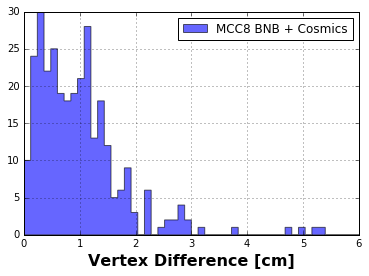

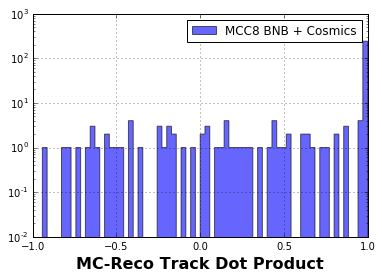

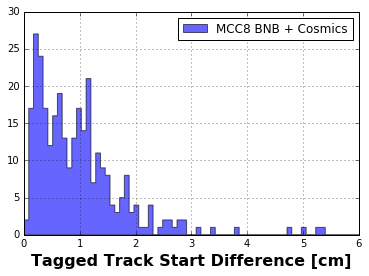

In [24]:
_,_,_ = plt.hist(df.vtx_diff.values,bins=50,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/VertexRes.png')

plt.figure()
_,_,_ = plt.hist(df.trk_dot.values,bins=70,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(-1,1))
plt.grid(True)
plt.xlabel('MC-Reco Track Dot Product',fontsize=16,weight='bold')
plt.legend()
plt.yscale('log')
plt.ylim(0.01,1000)
#plt.axvline(0.95)
plt.savefig('Plots/TrackDirRes.png')


plt.figure()
_,_,_ = plt.hist(df.trk_st_diff.values,bins=70,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Tagged Track Start Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/TrackStartRes.png')

#plt.yscale('log')

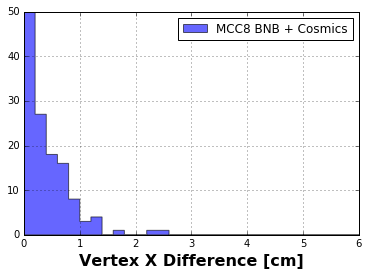

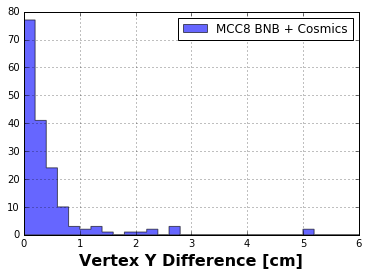

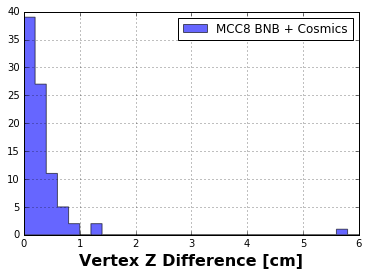

In [5]:
_,_,_ = plt.hist(df.diff_x,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex X Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/VtxResX.png')

plt.figure()
_,_,_ = plt.hist(df.diff_y,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Y Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/VtxResY.png')


plt.figure()
_,_,_ = plt.hist(df.diff_z,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Z Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/VtxResZ.png')


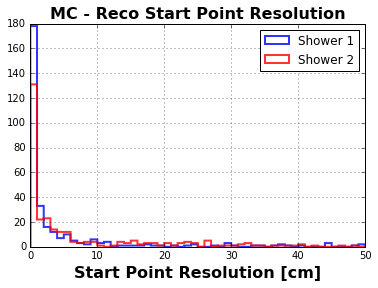

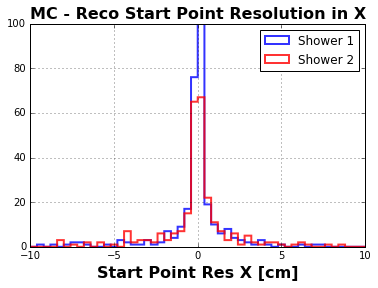

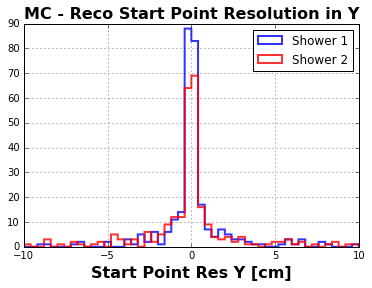

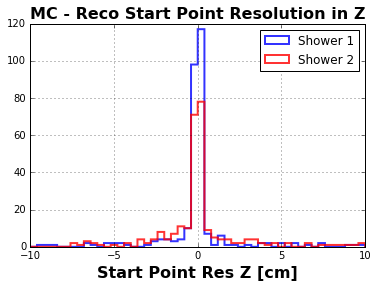

In [6]:
# The corresponding ana module has correction for space charge included
nbins = 50

_,_,_ = plt.hist(df.shr1_st_diff,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(0,50))
_,_,_ = plt.hist(df.shr2_st_diff,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(0,50))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution',fontsize=16,weight='bold')
plt.xlabel('Start Point Resolution [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/ShowerStartRes.png')

#plt.yscale('log')

plt.figure()
_,_,_ = plt.hist(df.shr1_diff_x,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_x,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in X',fontsize=16,weight='bold')
plt.xlabel('Start Point Res X [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/ShowerStartResX.png')


plt.figure()
_,_,_ = plt.hist(df.shr1_diff_y,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_y,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in Y',fontsize=16,weight='bold')
plt.xlabel('Start Point Res Y [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/ShowerStartResY.png')


plt.figure()
_,_,_ = plt.hist(df.shr1_diff_z,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_z,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in Z',fontsize=16,weight='bold')
plt.xlabel('Start Point Res Z [cm]',fontsize=16,weight='bold')
plt.legend()
plt.savefig('Plots/ShowerStartResZ.png')


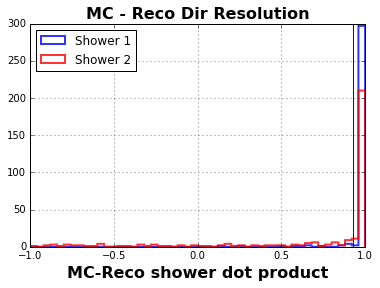

In [7]:

plt.figure()
_,_,_ = plt.hist(df.shr1_dot,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-1,1))
_,_,_ = plt.hist(df.shr2_dot,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-1,1))
plt.grid(True)
plt.title('MC - Reco Dir Resolution',fontsize=16,weight='bold')
plt.xlabel('MC-Reco shower dot product',fontsize=16,weight='bold')
plt.legend(loc=2)
#plt.yscale('log')
plt.axvline(0.93)
plt.savefig('Plots/ShowerDot.png')

#plt.ylim(0.01,1000)

In [8]:
a = df.query('shr2_st_diff < 8 and shr1_st_diff < 8')
print "SHIT" ,float(a.shape[0])/322

a = df.query('shr1_dot > .9 and shr2_dot > .9')
print "SHIT" ,float(a.shape[0])/322

a = df.query('shr1_dot > .9 and shr2_dot > .9 and vtx_diff < 6')
print float(a.shape[0])/322 * 100

a = df.query('shr2_st_diff < 8 and shr1_st_diff < 8 and vtx_diff < 6')
print float(a.shape[0])/322 * 100

SHIT 0.605590062112
SHIT 0.704968944099
69.2546583851
59.9378881988


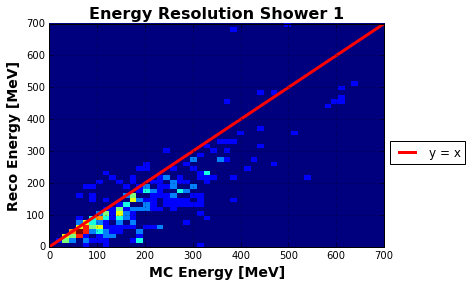

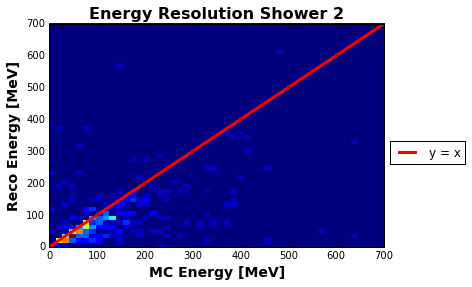

In [9]:
nbins = 50
x = np.linspace(0,700,50)

plt.hist2d(df.mc_shr1_e.values,df.reco_shr1_e.values,bins=nbins,range=[(0,700),(0,700)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 1',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/EnergyResShower1.png')

plt.figure()
plt.hist2d(df.mc_shr2_e.values,df.reco_shr2_e.values,bins=nbins,range=[(0,700),(0,700)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 2',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/EnergyResShower2.png')

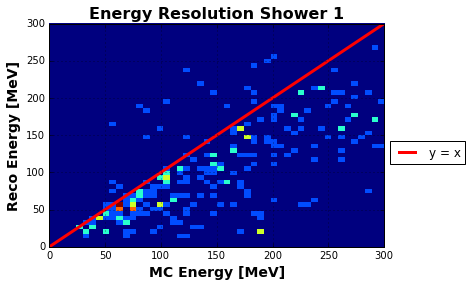

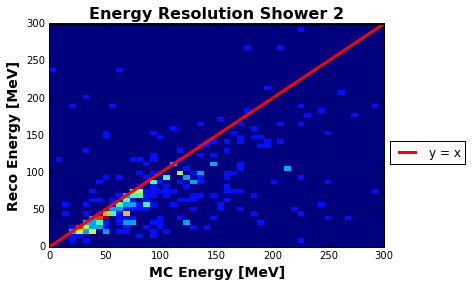

In [10]:
#ZOOM IN
nbins = 50
x = np.linspace(0,300,50)

plt.hist2d(df.mc_shr1_e.values,df.reco_shr1_e.values,bins=nbins,range=[(0,300),(0,300)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 1',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/EnergyResShower1_Zoom.png')

plt.figure()
plt.hist2d(df.mc_shr2_e.values,df.reco_shr2_e.values,bins=nbins,range=[(0,300),(0,300)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 2',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/EnergyResShower2_Zoom.png')

In [11]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

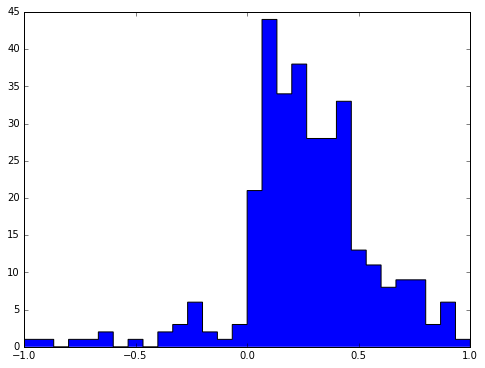

In [26]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df.eres1.values,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

In [27]:
# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins, n_counts, p0=([45.,0,0.5]))
print coeff

[ 37.32896983   0.25232882   0.20267131]


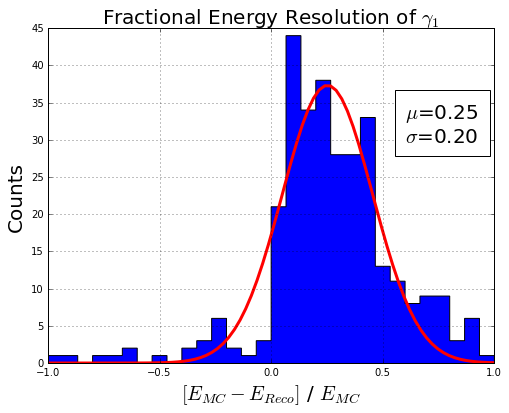

In [28]:
x_g = np.linspace(-1.,1.,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df.eres1,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Resolution of $\gamma_1$",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Reco}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/GammaRes1.png")

[ 29.81445575   0.22796339   0.24046914]


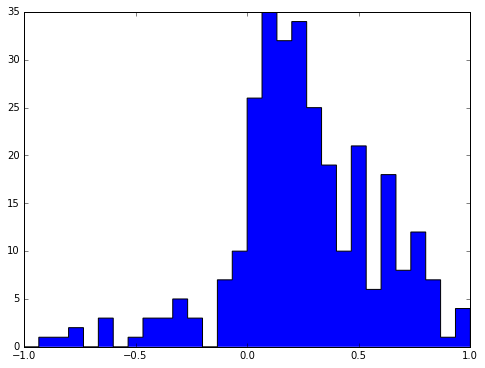

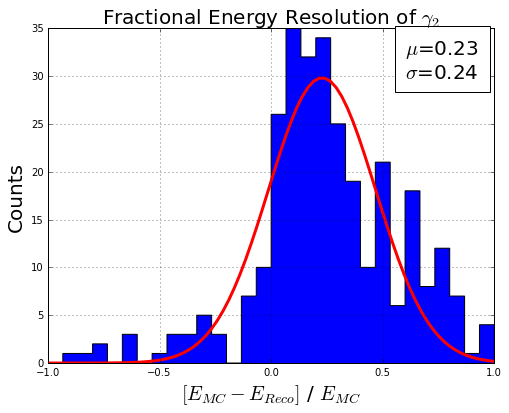

In [25]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df.eres2.values,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

coeff, _ = curve_fit(gauss, bins, n_counts, p0=([45.,0,0.5]))
print coeff

x_g = np.linspace(-1.,1.,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df.eres2,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Resolution of $\gamma_2$",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Reco}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/GammaRes2.png")